<a href="https://colab.research.google.com/github/vpkrishna/AIengineering/blob/main/Assignment_Introduction_to_LangChain_v0_2_0_and_LCEL_LangChain_Powered_RAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to LangChain v0.2.0 and LCEL: LangChain Powered RAG

In the following notebook we're going to focus on learning how to navigate and build useful applications using LangChain, specifically LCEL, and how to integrate different APIs together into a coherent RAG application!

In the notebook, you'll complete the following Tasks:

- 🤝 Breakout Room #1:
  1. Install required libraries
  2. Set Environment Variables
  3. Initialize a Simple Chain using LCEL
  4. Implement Naive RAG using LCEL

- 🤝 Breakout Room #2:
  1. Create a Simple RAG Application Using QDrant, OpenAI, and LCEL

Let's get started!



# 🤝 Breakout Room #1

## Task 1: Installing Required Libraries

One of the [key features](https://blog.langchain.dev/langchain-v02-leap-to-stability/) of LangChain v0.2.0 is the compartmentalization of the various LangChain ecosystem packages and added stability.

Instead of one all encompassing Python package - LangChain has a `core` package and a number of additional supplementary packages.

We'll start by grabbing all of our LangChain related packages!

In [5]:
!pip install -qU langchain langchain-core langchain-community langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.6/974.6 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.8/321.8 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 71.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00


Now we can get our Qdrant dependencies!

In [6]:
!pip install -qU qdrant-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.1/230.1 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.2/309.2 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 8.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires protobuf<5,>=3.20, but you have protobuf 5.27.1 which is incompatible.
google-ai-generativelanguage 0.6.4 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.27.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.27.1 which is incompatible.
google-cloud-aiplatfor

Let's finally get `tiktoken` and `pymupdf` so we can leverage them later on!

In [7]:
!pip install -qU tiktoken pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 76.8 MB/s eta 0:00:00


## Task 2: Set Environment Variables

We'll be leveraging OpenAI's suite of APIs - so we'll set our `OPENAI_API_KEY` `env` variable here!

In [8]:
import os
import getpass

os.environ["OPENAI_API_KEY"] = getpass.getpass("OpenAI API Key:")

OpenAI API Key:··········


## Task 3: Initialize a Simple Chain using LCEL

The first thing we'll do is familiarize ourselves with LCEL and the specific ins and outs of how we can use it!

### LLM Orchestration Tool (LangChain)

Let's dive right into [LangChain](https://www.langchain.com/)!

The first thing we want to do is create an object that lets us access OpenAI's `gpt-4o` model.

In [9]:
from langchain_openai import ChatOpenAI

openai_chat_model = ChatOpenAI(model="gpt-4o")

####❓ Question #1:

What other models could we use, and how would the above code change?

> HINT: Check out [this page](https://platform.openai.com/docs/models/gpt-3-5-turbo) to find the answer!

### Prompt Template

Now, we'll set up a prompt template - more specifically a `ChatPromptTemplate`. This will let us build a prompt we can modify when we call our LLM!

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "You are a legendary and mythical Wizard. You speak in riddles and make obscure and pun-filled references to exotic cheeses."
human_template = "{content}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template)
])

### Our First Chain

Now we can set up our first chain!

A chain is simply two components that feed directly into eachother in a sequential fashion!

You'll notice that we're using the pipe operator `|` to connect our `chat_prompt` to our `llm`.

This is a simplified method of creating chains and it leverages the LangChain Expression Language, or LCEL.

You can read more about it [here](https://python.langchain.com/docs/expression_language/), but there a few features we should be aware of out of the box (taken directly from LangChain's documentation linked above):

- **Async, Batch, and Streaming Support** Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.

- **Fallbacks** The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

- **Parallelism** Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.

In the following code cell we have two components:

- `chat_prompt`, which is a formattable `ChatPromptTemplate` that contains a system message and a human message.

We'd like to be able to pass our own `content` (as found in our `human_template`) and then have the resulting message pair sent to our model and responded to!

In [11]:
chain = chat_prompt | openai_chat_model

Notice the pattern here:

We invoke our chain with the `dict` `{"content" : "Hello world!"}`.

It enters our chain:

`{"content" : "Hello world!"}` -> `invoke()` -> `chat_prompt`

Our `chat_prompt` returns a `PromptValue`, which is the formatted prompt. We then "pipe" the output of our `chat_prompt` into our `llm`.

`PromptValue` -> `|` -> `llm`

Our `llm` then takes the list of messages and provides an output which is return as a `str`!







In [14]:
print(chain.invoke({"content": "Hello world!"}))

content='Ah, greetings, seeker of knowledge! Within the realm of existence you now find yourself, akin to a slice of Brie amidst a platter of mysteries. What conundrum or quest brings you to this enigmatic corner of the cosmos?' response_metadata={'token_usage': {'completion_tokens': 46, 'prompt_tokens': 38, 'total_tokens': 84}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_3e7d703517', 'finish_reason': 'stop', 'logprobs': None} id='run-af6995d3-2e52-4ff8-b030-3087577bd2f2-0' usage_metadata={'input_tokens': 38, 'output_tokens': 46, 'total_tokens': 84}


Let's try it out with a different prompt!

In [15]:
chain.invoke({"content" : "Could I please have some advice on how to become a better Python Programmer?"})

AIMessage(content='Ah, seeker of serpentine scripts, you wish to ascend the ladder of Python prognostication! Hearken unto my words, and may they brie-ng you enlightenment.\n\nFirstly, immerse thyself in the sacred texts and scrolls of documentation, for therein lies the wisdom of the ancients. Ponder deeply on the parables and examples, much like one would savor the nuances of a fine Roquefort.\n\nSecondly, practice is the key, much like grating a wheel of Parmigiano-Reggiano; the more you work at it, the finer your results shall be. Write code daily, solve puzzles, and embark on coding quests to hone your skills.\n\nThirdly, seek the fellowship of other coders. Join communities, much like a cheese board unites various flavors, and partake in discussions, code reviews, and collaborative projects. Their perspectives will be the cheddar to your Gouda, enriching your understanding.\n\nFourthly, master the art of debugging. This is akin to distinguishing a true Camembert from an impostor 

Notice how we specifically referenced our `content` format option!

Now that we have the basics set up - let's see what we mean by "Retrieval Augmented" Generation.

## Naive RAG - Manually adding context through the Prompt Template

Let's look at how our model performs at a simple task - defining what LangChain is!

We'll redo some of our previous work to change the `system_template` to be less...verbose.

In [16]:
system_template = "You are a helpful assistant."
human_template = "{content}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", system_template),
    ("human", human_template)
])

chat_chain = chat_prompt | openai_chat_model

print(chat_chain.invoke({"content" : "Please define LangChain."}))

content='LangChain is a framework designed for developing applications that are powered by language models. It provides tools and capabilities that enable developers to build applications that can handle tasks involving natural language understanding and generation. This framework focuses on several key areas to facilitate language model-based application development:\n\n1. **Prompt Management**: LangChain helps in creating and managing prompts that are used to interact with language models.\n\n2. **Memory Management**: It provides mechanisms to manage state or memory over a series of interactions, which is crucial for maintaining context in conversational applications.\n\n3. **Support for Multiple Chains**: LangChain allows developers to build complex applications by chaining together multiple calls to language models and other tools.\n\n4. **Integration with Data Sources**: It can connect applications with various data sources to enhance the capabilities of language models.\n\n5. **A

Well, that's not very good - is it!

The issue at play here is that our model was not trained on the idea of "LangChain", and so it's left with nothing but a guess - definitely not what we want the answer to be!

Let's ask another simple LangChain question!

In [17]:
print(chat_chain.invoke({"content" : "What is LangChain Expression Language (LECL)?"}))

content='LangChain Expression Language (LCEL) is a specialized language designed to facilitate the creation and manipulation of expressions within the LangChain framework. LangChain itself is a framework tailored for developing applications that integrate with language models, enabling developers to build sophisticated natural language processing applications.\n\nLCEL allows developers to define, evaluate, and manipulate expressions that can interact with various components of the LangChain ecosystem. This capability is particularly useful for tasks such as chaining together multiple language model calls, applying transformations to inputs and outputs, and orchestrating complex workflows involving multiple steps and data sources.\n\nKey features of LCEL include:\n\n1. **Expression Syntax**: LCEL provides a clear and concise syntax for defining expressions, making it easy to specify the logic and operations needed for a given task.\n\n2. **Integration with LangChain Components**: LCEL e

While it provides a confident response, that response is entirely ficticious! Not a great look, OpenAI!

However, let's see what happens when we rework our prompts - and we add the content from the docs to our prompt as context.

In [23]:
HUMAN_TEMPLATE = """
#CONTEXT:
{context}

QUERY:
{query}

Use the provide context to answer the provided user query. Only use the provided context to answer the query. If you do not know the answer, response with "I don't know"
"""

CONTEXT = """
LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.

Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.

Seamless LangSmith Tracing Integration As your chains get more and more complex, it becomes increasingly important to understand what exactly is happening at every step. With LCEL, all steps are automatically logged to LangSmith for maximal observability and debuggability.
"""

chat_prompt = ChatPromptTemplate.from_messages([
    ("human", HUMAN_TEMPLATE)
])

chat_chain = chat_prompt | openai_chat_model

print(chat_chain.invoke({"query" : "What is LangChain Expression Language?", "context" : CONTEXT}))

content='LangChain Expression Language (LCEL) is a declarative way to easily compose chains together. It offers several benefits, including support for synchronous, asynchronous, batch, and streaming operations; the ability to attach fallbacks for error handling; automatic parallelism for components that can run concurrently; and seamless integration with LangSmith for detailed tracing and debugging of complex chains.' response_metadata={'token_usage': {'completion_tokens': 72, 'prompt_tokens': 274, 'total_tokens': 346}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_3e7d703517', 'finish_reason': 'stop', 'logprobs': None} id='run-0d8d1e86-e338-4530-a969-323e09b8e53e-0' usage_metadata={'input_tokens': 274, 'output_tokens': 72, 'total_tokens': 346}


You'll notice that the response is much better this time. Not only does it answer the question well - but there's no trace of confabulation (hallucination) at all!

> NOTE: While RAG is an effective strategy to *help* ground LLMs, it is not nearly 100% effective. You will still need to ensure your responses are factual through some other processes

That, in essence, is the idea of RAG. We provide the model with context to answer our queries - and rely on it to translate the potentially lengthy and difficult to parse context into a natural language answer!

However, manually providing context is not scalable - and doesn't really offer any benefit.

Enter: Retrieval Pipelines.

## Task #4: Implement Naive RAG using LCEL

Now we can make a naive RAG application that will help us bridge the gap between our Pythonic implementation and a fully LangChain powered solution!

## Putting the R in RAG: Retrieval 101

In order to make our RAG system useful, we need a way to provide context that is most likely to answer our user's query to the LLM as additional context.

Let's tackle an immediate problem first: The Context Window.

All (most) LLMs have a limited context window which is typically measured in tokens. This window is an upper bound of how much stuff we can stuff in the model's input at a time.

Let's say we want to work off of a relatively large piece of source data - like the Ultimate Hitchhiker's Guide to the Galaxy. All 898 pages of it!

> NOTE: It is recommended you do not run the following cells, they are purely for demonstrative purposes.

In [24]:
context = """
EVERY HITCHHIKER'S GUIDE BOOK
"""

We can leverage our tokenizer to count the number of tokens for us!

In [25]:
import tiktoken

enc = tiktoken.encoding_for_model("gpt-4o")

In [20]:
len(enc.encode(context))

12

The full set comes in at a whopping *636,144* tokens.

So, we have too much context. What can we do?

Well, the first thing that might enter your mind is: "Use a model with more context window", and we could definitely do that! However, even `gpt-4-32k` wouldn't be able to fit that whole text in the context window at once.

So, we can try splitting our document up into little pieces - that way, we can avoid providing too much context.

We have another problem now.

If we split our document up into little pieces, and we can't put all of them in the prompt. How do we decide which to include in the prompt?!

> NOTE: Content splitting/chunking strategies are an active area of research and iterative developement. There is no "one size fits all" approach to chunking/splitting at this moment. Use your best judgement to determine chunking strategies!

In order to conceptualize the following processes - let's create a toy context set!

### TextSplitting aka Chunking

We'll use the `RecursiveCharacterTextSplitter` to create our toy example.

It will split based on the following rules:

- Each chunk has a maximum size of 100 tokens
- It will try and split first on the `\n\n` character, then on the `\n`, then on the `<SPACE>` character, and finally it will split on individual tokens.

Let's implement it and see the results!

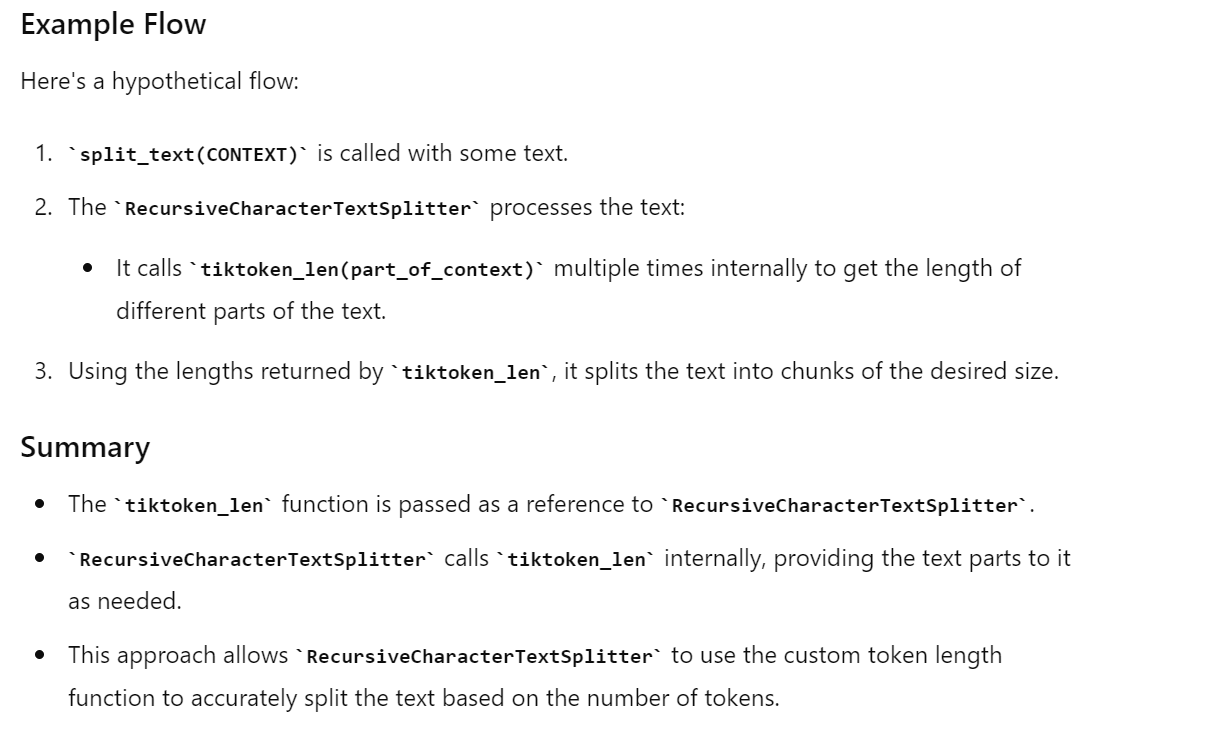

In [21]:
import tiktoken
from langchain.text_splitter import RecursiveCharacterTextSplitter

def tiktoken_len(text):
    tokens = tiktoken.encoding_for_model("gpt-4o").encode(
        text,
    )
    return len(tokens)

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 100,
    chunk_overlap = 0,
    length_function = tiktoken_len,
)

In [26]:
chunks = text_splitter.split_text(CONTEXT)

In [30]:
for chunk in chunks:
  print(chunk, len(chunk))
  print("----")

LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface. 470
----
Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are. 358
----
Seamless LangSmith Tracing Integration As your chains get more and more complex, it becomes increasingly important to understand what exactly is happeni

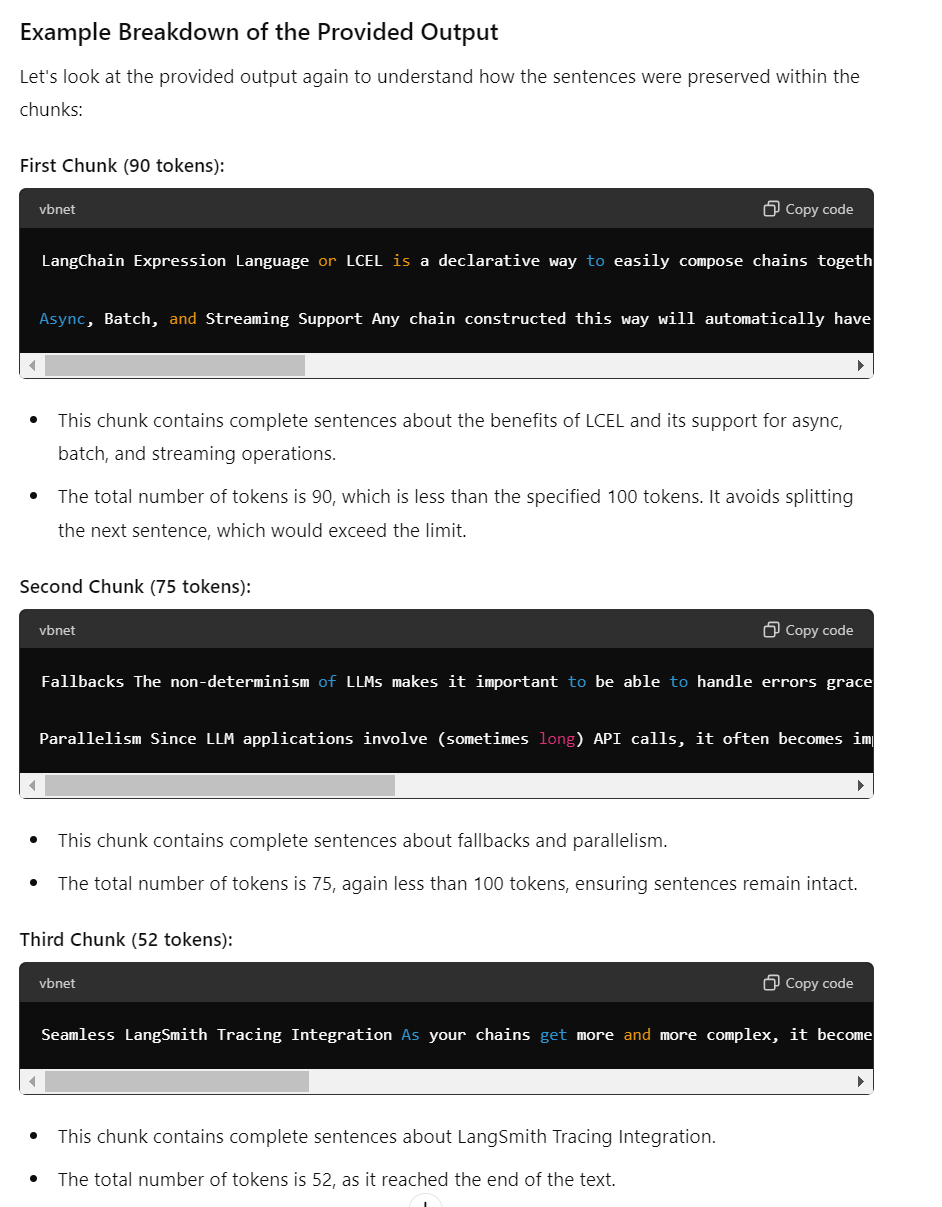

As is shown in our result, we've split each section into 100 token chunks - cleanly separated by `\n\n` characters!

####🏗️ Activity #1:

While there's nothing specifically wrong with the chunking method used above - it is a naive approach that is not sensitive to specific data formats.

Brainstorm some ideas that would split large single documents into smaller documents.

1. Split by similar topics
2. Split by heading and sub heading
3. Split by chapters or some unqiye identifier

## Embeddings and Dense Vector Search

Now that we have our individual chunks, we need a system to correctly select the relevant pieces of information to answer our query.

This sounds like a perfect job for embeddings!

We'll be using OpenAI's `text-embedding-3` model as our embedding model today!

Let's load it up through LangChain.

In [31]:
from langchain_openai.embeddings import OpenAIEmbeddings

embedding_model = OpenAIEmbeddings(model="text-embedding-3-small")

####❓ Question #2:

What is the embedding dimension, given that we're using `text-embedding-3-small`?

> HINT: Check out the [docs](https://platform.openai.com/docs/guides/embeddings) to help you answer this question.

Answer==> 1536 .Thats each word is represented by a 1536 dimesnion vector

### Finding the Embeddings for Our Chunks

First, let's find all our embeddings for each chunk and store them in a convenient format for later.

In [32]:
embeddings_dict = {}

for chunk in chunks:
  embeddings_dict[chunk] = embedding_model.embed_query(chunk)

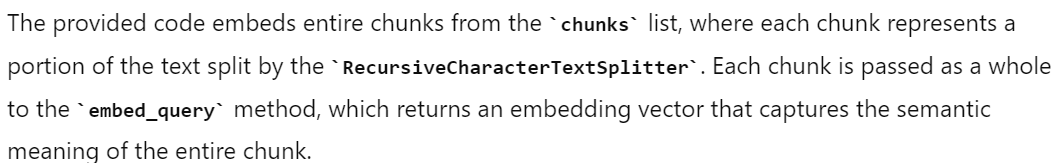

In [33]:
for k,v in embeddings_dict.items():
  print(f"Chunk - {k}")
  print("---")
  print(f"Embedding - Vector of Size: {len(v)}")
  print("\n\n")

Chunk - LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.
---
Embedding - Vector of Size: 1536



Chunk - Fallbacks The non-determinism of LLMs makes it important to be able to handle errors gracefully. With LCEL you can easily attach fallbacks to any chain.

Parallelism Since LLM applications involve (sometimes long) API calls, it often becomes important to run things in parallel. With LCEL syntax, any components that can be run in parallel automatically are.
---
Embedding - Vector of Size: 1536



Chunk - Seamless LangSmith Tracing Integration As your chains get more and

Okay, great. Let's create a query - and then embed it!

In [34]:
query = "Can LCEL help take code from the notebook to production?"

query_vector = embedding_model.embed_query(query)
print(f"Vector of Size: {len(query_vector)}")

Vector of Size: 1536


Now, let's compare it against each existing chunk's embedding by using cosine similarity.

In [36]:
import numpy as np
from numpy.linalg import norm

def cosine_similarity(vec_1, vec_2):
  return np.dot(vec_1, vec_2) / (norm(vec_1) * norm(vec_2))

In [37]:
max_similarity = -float('inf')
closest_chunk = ""

for chunk, chunk_vector in embeddings_dict.items():
  cosine_similarity_score = cosine_similarity(chunk_vector, query_vector)

  if cosine_similarity_score > max_similarity:
    closest_chunk = chunk
    max_similarity = cosine_similarity_score

print(closest_chunk)
print(max_similarity)

LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):

Async, Batch, and Streaming Support Any chain constructed this way will automatically have full sync, async, batch, and streaming support. This makes it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface.
0.5372655406955072


And we get the expected result, which is the passage that specifically mentions prototyping in a Jupyter Notebook!

### Creating a Retriever

Now that we have an idea of how we're getting our most relevant information - let's see how we could create a pipeline that would automatically extract the closest chunk to our query and use it as context for our prompt!

First, we'll wrap the above in a helper function!

In [38]:
def retrieve_context(query, embeddings_dict, embedding_model):
  query_vector = embedding_model.embed_query(query)
  max_similarity = -float('inf')
  closest_chunk = ""

  for chunk, chunk_vector in embeddings_dict.items():
    cosine_similarity_score = cosine_similarity(chunk_vector, query_vector)

    if cosine_similarity_score > max_similarity:
      closest_chunk = chunk
      max_similarity = cosine_similarity_score

  return closest_chunk

Now, let's add it to our pipeline!

In [39]:
def simple_rag(query, embeddings_dict, embedding_model, chat_chain):
  context = retrieve_context(query, embeddings_dict, embedding_model)

  response = chat_chain.invoke({"query" : query, "context" : context})

  return_package = {
      "query" : query,
      "response" : response,
      "retriever_context" : context
  }

  return return_package

In [40]:
simple_rag("Can LCEL help take code from the notebook to production?", embeddings_dict, embedding_model, chat_chain)

{'query': 'Can LCEL help take code from the notebook to production?',
 'response': AIMessage(content='Yes, LCEL can help take code from the notebook to production. Since any chain constructed using LCEL will automatically have full sync, async, batch, and streaming support, it facilitates the transition from prototyping a chain in a Jupyter notebook to exposing it as an async streaming interface suitable for production environments.', response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 152, 'total_tokens': 214}, 'model_name': 'gpt-4o', 'system_fingerprint': 'fp_9cb5d38cf7', 'finish_reason': 'stop', 'logprobs': None}, id='run-2d516747-cdc6-4085-8183-2d4800bb6553-0', usage_metadata={'input_tokens': 152, 'output_tokens': 62, 'total_tokens': 214}),
 'retriever_context': 'LangChain Expression Language or LCEL is a declarative way to easily compose chains together. There are several benefits to writing chains in this manner (as opposed to writing normal code):\n\nAsy

####❓ Question #3:

What does LCEL do that makes it more reliable at scale?

> HINT: Use your newly created `simple_rag` to help you answer this question!

Answer==>Async, Batch, and Streaming Support making it easy to prototype a chain in a Jupyter notebook using the sync interface, and then expose it as an async streaming interface for production use

# 🤝 Breakout Room #2

## Task #5: Create a Simple RAG Application Using Qdrant, OpenAI, and LCEL

Now that we have a grasp on how LCEL works, and how we can use LangChain and OpenAI to interact with our data - let's step it up a notch and incorporate Qdrant!

## LangChain Powered RAG

First and foremost, LangChain provides a convenient way to store our chunks and their embeddings.

It's called a `VectorStore`!

We'll be using Drant as our `VectorStore` today. You can read more about it [here](https://qdrant.tech/documentation/).

Think of a `VectorStore` as a smart way to house your chunks and their associated embedding vectors. The implementation of the `VectorStore` also allows for smarter and more efficient search of our embedding vectors - as the method we used above would not scale well as we got into the millions of chunks.

Otherwise, the process remains relatively similar under the hood!

Let's use [Steve Jobs iPhone 2007 Presentation Introduction Speech PDF](https://singjupost.com/wp-content/uploads/2014/07/Steve-Jobs-iPhone-2007-Presentation-Full-Transcript.pdf) as our data today!

### Data Collection

We'll be leveraging the `PyMUPDFLoader` to load our PDF directly from the web!

In [41]:
from langchain.document_loaders import PyMuPDFLoader

docs = PyMuPDFLoader("https://singjupost.com/wp-content/uploads/2014/07/Steve-Jobs-iPhone-2007-Presentation-Full-Transcript.pdf").load()

### Chunking Our Documents

Let's do the same process as we did before with our `RecursiveCharacterTextSplitter` - but this time we'll use ~200 tokens as our max chunk size!

In [42]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 200,
    chunk_overlap = 0,
    length_function = tiktoken_len,
)

split_chunks = text_splitter.split_documents(docs)

In [43]:
len(split_chunks)

86

Alright, now we have 516 ~200 token long documents.

Let's verify the process worked as intended by checking our max document length.

In [44]:
max_chunk_length = 0

for chunk in split_chunks:
  max_chunk_length = max(max_chunk_length, tiktoken_len(chunk.page_content))

print(max_chunk_length)

197


Perfect! Now we can carry on to creating and storing our embeddings.

### Embeddings and Vector Storage

We'll use the `text-embedding-3-small` embedding model again - and `Qdrant` to store all our embedding vectors for easy retrieval later!

In [45]:
from langchain_community.vectorstores import Qdrant

qdrant_vectorstore = Qdrant.from_documents(
    split_chunks,
    embedding_model,
    location=":memory:",
    collection_name="Steve Job's Speech",
)

Now let's set up our retriever, just as we saw before, but this time using LangChain's simple `as_retriever()` method!

In [46]:
qdrant_retriever = qdrant_vectorstore.as_retriever()

#### Back to the Flow

We're ready to move to the next step!

### Setting up our RAG

We'll use the LCEL we touched on earlier to create a RAG chain.

Let's think through each part:

1. First we need to retrieve context
2. We need to pipe that context to our model
3. We need to parse that output

Let's start by setting up our prompt again, just so it's fresh in our minds!

####🏗️ Activity #2:

Complete the prompt so that your RAG application answers queries based on the context provided, but *does not* answer queries if the context is unrelated to the query.

In [47]:
RAG_PROMPT = """
CONTEXT:
{context}

QUERY:
{question}

<< Answer queries based only on context provided. If the query and context are not related then do not answer.I repeat answer only if query is related to conetxt provided >>
"""

rag_prompt = ChatPromptTemplate.from_template(RAG_PROMPT)

#### Our RAG Chain

Notice how we have a bit of a more complex chain this time - that's because we want to return our sources with the response.

Let's break down the chain step-by-step:

1. We invoke the chain with the `question` item. Notice how we only need to provide `question` since both the retreiver and the `"question"` object depend on it.
  - We also chain our `"question"` into our `retriever`! This is what ultimately collects the context through Qdrant.
2. We assign our collected context to a `RunnablePassthrough()` from the previous object. This is going to let us simply pass it through to the next step, but still allow us to run that section of the chain.
3. We finally collect our response by chaining our prompt, which expects both a `"question"` and `"context"`, into our `llm`. We also, collect the `"context"` again so we can output it in the final response object.

The key thing to keep in mind here is that we need to pass our context through *after* we've retrieved it - to populate the object in a way that doesn't require us to call it or try and use it for something else.

In [48]:
from operator import itemgetter
from langchain.schema.output_parser import StrOutputParser
from langchain.schema.runnable import RunnablePassthrough

retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | qdrant_retriever, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": rag_prompt | openai_chat_model, "context": itemgetter("context")}
)

Let's get a visual understanding of our chain!

In [49]:
!pip install -qU grandalf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00


In [50]:
print(retrieval_augmented_qa_chain.get_graph().draw_ascii())

                       +---------------------------------+                         
                       | Parallel<context,question>Input |                         
                       +---------------------------------+                         
                           *****                   ****                            
                        ***                            ****                        
                     ***                                   ****                    
+--------------------------------+                             **                  
| Lambda(itemgetter('question')) |                              *                  
+--------------------------------+                              *                  
                 *                                              *                  
                 *                                              *                  
                 *                                              *           

Let's try another visual representation:

![image](https://i.imgur.com/Ad31AhL.png)

Let's test our chain out!

In [51]:
response = retrieval_augmented_qa_chain.invoke({"question" : "What is the most important thing about the iPhone?"})

In [52]:
response["response"].content

'The most important thing about the iPhone, as highlighted in the provided context, is its innovative design and advanced technology. This includes the multi-touch screen, miniaturization, custom silicon, power management, OSX inside a mobile device, advanced sensors, desktop-class applications, and its functionality as a widescreen video iPod. Additionally, the iPhone is described as the "ultimate digital device" that essentially puts "your life in your pocket."'

In [53]:
for context in response["context"]:
  print("Context:")
  print(context)
  print("----")

Context:
page_content='of the art in every facet of this design. So let me just talk a little bit about it here. We’ve got\nthe multi-touch screen. A first. Miniaturization, more than any we’ve done before. A lot of\ncustom silicon. Tremendous power management. OSX inside a mobile device. Featherweight\nprecision enclosures. Three advanced sensors. Desktop class applications, and of course, the\nwidescreen video iPod. We’ve been innovating like crazy for the last few years on this, and\nwe filed for over 200 patents for all the inventions in iPhone, and we intend to protect them.\nSo, a lot of high technology. I think we’re advancing the state of the art in every aspect of\nthis design. So iPhone is like having your life in your pocket. It’s the ultimate digital device.' metadata={'source': 'https://singjupost.com/wp-content/uploads/2014/07/Steve-Jobs-iPhone-2007-Presentation-Full-Transcript.pdf', 'file_path': 'https://singjupost.com/wp-content/uploads/2014/07/Steve-Jobs-iPhone-2007-Pr

Let's see if it can handle a query that is totally unrelated to the source documents.

In [54]:
response = retrieval_augmented_qa_chain.invoke({"question" : "What is the airspeed velocity of an unladen swallow?"})

In [55]:
response["response"].content

"The query about the airspeed velocity of an unladen swallow is not related to the context provided, which is about Steve Jobs' 2007 iPhone presentation. Therefore, I cannot answer this query based on the provided context."

####❓ Question #4:

What key innovations did the iPhone introduce?

> HINT: Use your RAG Chain to answer this question.


In [57]:
print(retrieval_augmented_qa_chain.invoke({"question" : "What key innovations did the iPhone introduce?"})["response"].content)

The iPhone introduced several key innovations:

1. **Widescreen iPod with Touch Controls**: The iPhone combined the functionality of an iPod with a touchscreen interface, allowing users to interact with their music in new ways.
   
2. **Revolutionary Mobile Phone**: The iPhone aimed to reinvent the phone by simplifying the process of making calls and integrating contacts more seamlessly. It allowed users to sync their contacts with their PC or Mac, ensuring they had all their contacts available at all times.

3. **Breakthrough Internet Communications Device**: The iPhone also served as an advanced internet communications device, integrating features beyond just phone calls and music.

4. **Multi-Touch Screen**: This was a first in mobile devices, allowing for more intuitive and flexible interaction with the device.

5. **Miniaturization and Custom Silicon**: The iPhone included advanced miniaturization and custom silicon that improved power management and overall device performance.

6